In [1]:
# Instalando a API do Banco Central
!pip install python-bcb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 68 kB 6.7 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 80 kB 10.7 MB/s 


In [24]:
# Importando as bibliotecas necessárias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.interpolate import make_interp_spline
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from scipy.interpolate import interp1d
import matplotlib.image as mpimg

In [18]:
# Configurando o plot para ele sair em alta definição 
plt.rcParams['figure.dpi'] = 100

In [4]:
# Importando o módulo de gerador de séries temporais da base do BC
from bcb import sgs

## Gráfico do IPCA pós Plano Real por Governo 

In [19]:
# Puxando os dados da série do IPCA
ipca = sgs.get({'IPCA': 433}, start = '1994-12-01')
# Resetando o index
ipca.reset_index(inplace=True) #Com esse comando não criamos um novo dataframe, mas substituimos o antigo 
ipca

,Date,IPCA
0,1994-12-01,1.71
1,1995-01-01,1.70
2,1995-02-01,1.02
3,1995-03-01,1.55
4,1995-04-01,2.43
...,...,...
326,2022-02-01,1.01
327,2022-03-01,1.62
328,2022-04-01,1.06
329,2022-05-01,0.47


In [6]:
# Calculando o IPCA do Mês corrente
ipca_corrente = ipca["IPCA"]

In [7]:
# Calculando o IPCA do mes base
ipca_base = ipca_corrente.shift(1)

In [8]:
# Calculando a variação percentual mensal do IPCA 
ipca["Variação Percentual Mensal do IPCA"] = ((ipca_corrente/ipca_base)-1)*100
ipca.reset_index(inplace = True)

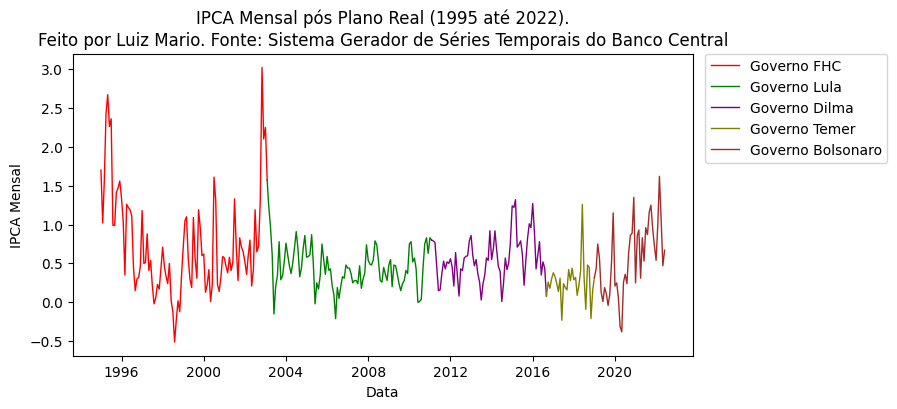

In [9]:
# Plotando o gráfico sem o grid
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(ipca["Date"].iloc[1:99],        #Separando o dataframe pelo index 
        ipca['IPCA'].iloc[1:99],
        color = 'red',                  #Cada cor representa um governo
        linewidth = 1)
ax.plot(ipca["Date"].iloc[98:195],
        ipca['IPCA'].iloc[98:195],
        color = 'green',
        linewidth = 1)
ax.plot(ipca["Date"].iloc[194:262],
        ipca['IPCA'].iloc[194:262],
        color = 'purple',
        linewidth = 1)
ax.plot(ipca["Date"].iloc[261:290],
        ipca['IPCA'].iloc[261:290],
        color = 'olive',
        linewidth = 1)
ax.plot(ipca["Date"].iloc[289:],
        ipca['IPCA'].iloc[289:],
        color = 'brown',
        linewidth = 1)
plt.title("IPCA Mensal pós Plano Real (1995 até 2022).\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central", loc='center')
ax.set_ylabel("IPCA Mensal")
ax.set_xlabel("Data")
plt.legend(labels = ['Governo FHC','Governo Lula','Governo Dilma','Governo Temer','Governo Bolsonaro'], loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.grid(False)
plt.show()

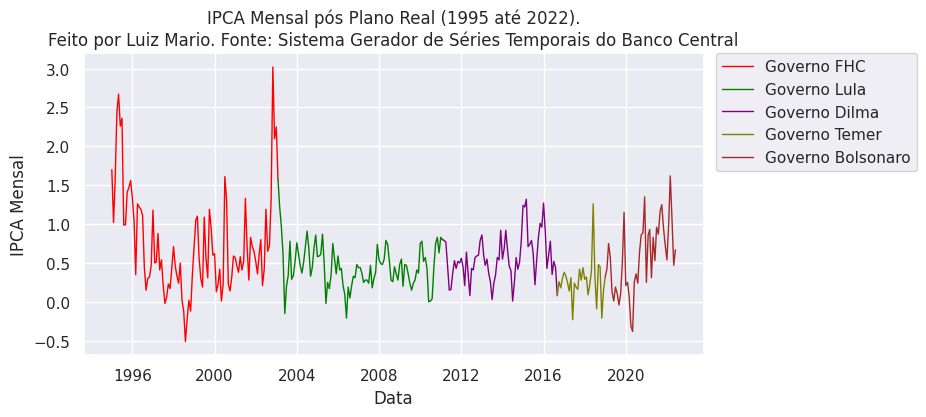

In [10]:
# Plotando o grafico com o grid
sns.set()
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(ipca["Date"].iloc[1:99],
        ipca['IPCA'].iloc[1:99],
        color = 'red',
        linewidth = 1)
ax.plot(ipca["Date"].iloc[98:195],
        ipca['IPCA'].iloc[98:195],
        color = 'green',
        linewidth = 1)
ax.plot(ipca["Date"].iloc[194:262],
        ipca['IPCA'].iloc[194:262],
        color = 'purple',
        linewidth = 1)
ax.plot(ipca["Date"].iloc[261:290],
        ipca['IPCA'].iloc[261:290],
        color = 'olive',
        linewidth = 1)
ax.plot(ipca["Date"].iloc[289:],
        ipca['IPCA'].iloc[289:],
        color = 'brown',
        linewidth = 1)
plt.title("IPCA Mensal pós Plano Real (1995 até 2022).\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central", loc='center')
ax.set_ylabel("IPCA Mensal")
ax.set_xlabel("Data")
plt.legend(labels = ['Governo FHC','Governo Lula','Governo Dilma','Governo Temer','Governo Bolsonaro'], loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


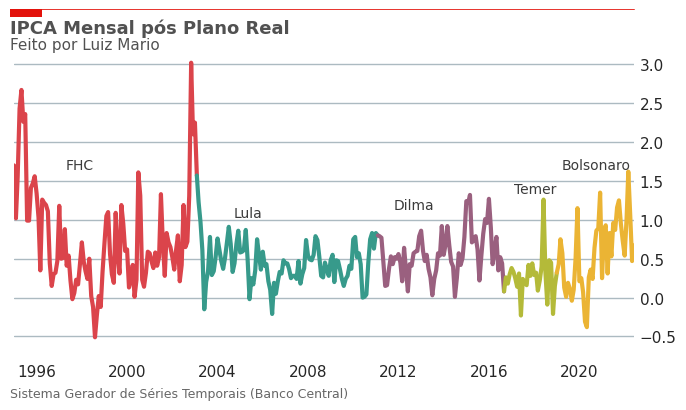

In [35]:
# Layout the Economist 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
ax.plot(ipca["Date"].iloc[1:99],
        ipca['IPCA'].iloc[1:99],
        color = '#DB444B',
        linewidth = 3)
ax.plot(ipca["Date"].iloc[98:195],
        ipca['IPCA'].iloc[98:195],
        color = '#379A8B',
        linewidth = 3)
ax.plot(ipca["Date"].iloc[194:262],
        ipca['IPCA'].iloc[194:262],
        color = '#9A607F',
        linewidth = 3)
ax.plot(ipca["Date"].iloc[261:290],
        ipca['IPCA'].iloc[261:290],
        color = '#B4BA39',
        linewidth = 3)
ax.plot(ipca["Date"].iloc[289:],
        ipca['IPCA'].iloc[289:],
        color = '#EBB434',
        linewidth = 3)
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 

# Configurando o limite para x 
ax.set_xlim(pd.datetime(1995, 1, 1), pd.datetime(2022, 6, 1))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 

ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.19, y=.58, s='FHC', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.40, y=.46, s='Lula', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.60, y=.48, s='Dilma', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.75, y=.52, s='Temer', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.81, y=.58, s='Bolsonaro', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.92, s="IPCA Mensal pós Plano Real", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.88, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Sistema Gerador de Séries Temporais (Banco Central)""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',           # Configurando o caminho e o nome do arquivo
            dpi = 300,                     # Configurando os pontos por polegada
            bbox_inches="tight",           # Removendo espaço em branco extra
            facecolor='white')             # Configurando o fundo para branco

## Gráfico da Taxa SELIC pós Plano Real por Governo

In [36]:
# Taxa Selic
tx_selic = sgs.get({'Taxa SELIC':432})
tx_selic.reset_index(inplace=True) 
tx_selic

,Date,Taxa SELIC
0,1999-03-05,45.00
1,1999-03-06,45.00
2,1999-03-07,45.00
3,1999-03-08,45.00
4,1999-03-09,45.00
...,...,...
8548,2022-07-30,13.25
8549,2022-07-31,13.25
8550,2022-08-01,13.25
8551,2022-08-02,13.25


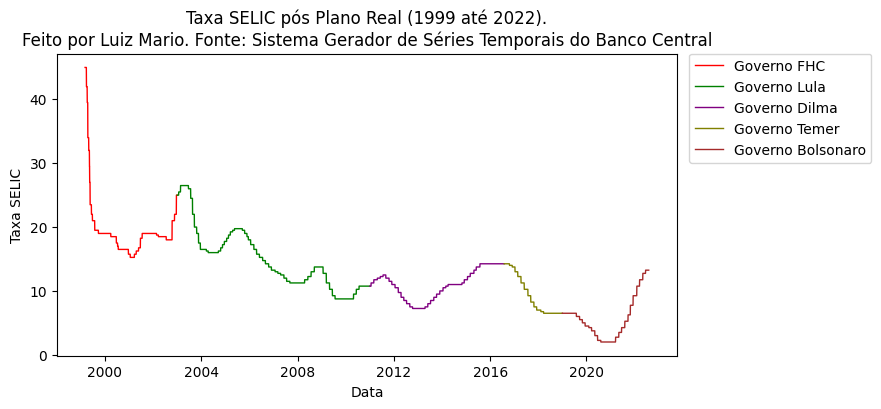

In [8]:
# Plotando o grafico sem o grid
# Definindo o tambho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados
ax.plot(tx_selic["Date"].iloc[0:1399],
        tx_selic['Taxa SELIC'].iloc[0:1399],
        color = 'red',
        linewidth = 1)
ax.plot(tx_selic["Date"].iloc[1398:4323],
        tx_selic['Taxa SELIC'].iloc[1398:4323],
        color = 'green',
        linewidth = 1)
ax.plot(tx_selic["Date"].iloc[4322:6360],
        tx_selic['Taxa SELIC'].iloc[4322:6360],
        color = 'purple',
        linewidth = 1)
ax.plot(tx_selic["Date"].iloc[6359:7243],
        tx_selic['Taxa SELIC'].iloc[6359:7243],
        color = 'olive',
        linewidth = 1)
ax.plot(tx_selic["Date"].iloc[7242:],
        tx_selic['Taxa SELIC'].iloc[7242:],
        color = 'brown',
        linewidth = 1)
# Definindo título, subtítulo e nomes dos eixos
plt.title("Taxa SELIC pós Plano Real (1999 até 2022).\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central", loc='center')
ax.set_ylabel("Taxa SELIC")
ax.set_xlabel("Data")
plt.legend(labels = ['Governo FHC','Governo Lula','Governo Dilma','Governo Temer','Governo Bolsonaro'], loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.show()

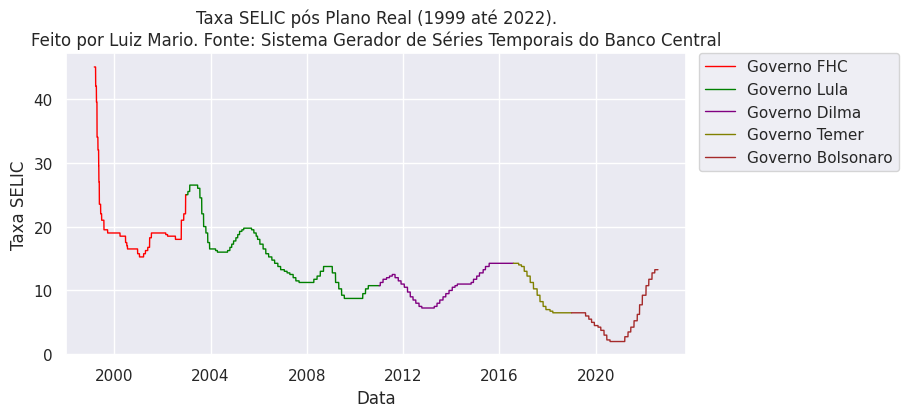

In [10]:
# Gráfico com o Grid 
# Definindo o tambho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
sns.set()
# Plotando os dados
ax.plot(tx_selic["Date"].iloc[0:1399],
        tx_selic['Taxa SELIC'].iloc[0:1399],
        color = 'red',
        linewidth = 1)
ax.plot(tx_selic["Date"].iloc[1398:4323],
        tx_selic['Taxa SELIC'].iloc[1398:4323],
        color = 'green',
        linewidth = 1)
ax.plot(tx_selic["Date"].iloc[4322:6360],
        tx_selic['Taxa SELIC'].iloc[4322:6360],
        color = 'purple',
        linewidth = 1)
ax.plot(tx_selic["Date"].iloc[6359:7243],
        tx_selic['Taxa SELIC'].iloc[6359:7243],
        color = 'olive',
        linewidth = 1)
ax.plot(tx_selic["Date"].iloc[7242:],
        tx_selic['Taxa SELIC'].iloc[7242:],
        color = 'brown',
        linewidth = 1)
# Definindo título, subtítulo e nomes dos eixos
plt.title("Taxa SELIC pós Plano Real (1999 até 2022).\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central", loc='center')
ax.set_ylabel("Taxa SELIC")
ax.set_xlabel("Data")
plt.legend(labels = ['Governo FHC','Governo Lula','Governo Dilma','Governo Temer','Governo Bolsonaro'], loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


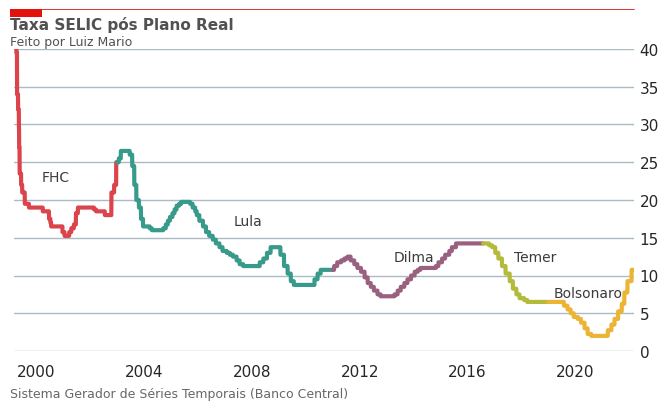

In [38]:
# Layout the Economist 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
ax.plot(tx_selic["Date"].iloc[0:1399],
        tx_selic['Taxa SELIC'].iloc[0:1399],
        color = '#DB444B',
        linewidth = 3)
ax.plot(tx_selic["Date"].iloc[1398:4323],
        tx_selic['Taxa SELIC'].iloc[1398:4323],
        color = '#379A8B',
        linewidth = 3)
ax.plot(tx_selic["Date"].iloc[4322:6360],
        tx_selic['Taxa SELIC'].iloc[4322:6360],
        color = '#9A607F',
        linewidth = 3)
ax.plot(tx_selic["Date"].iloc[6359:7243],
        tx_selic['Taxa SELIC'].iloc[6359:7243],
        color = '#B4BA39',
        linewidth = 3)
ax.plot(tx_selic["Date"].iloc[7242:],
        tx_selic['Taxa SELIC'].iloc[7242:],
        color = '#EBB434',
        linewidth = 3)
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(0,40)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(1999, 3, 5), pd.datetime(2022, 3, 8))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.16, y=.55, s='FHC', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.40, y=.44, s='Lula', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.60, y=.35, s='Dilma', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.75, y=.35, s='Temer', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.80, y=.26, s='Bolsonaro', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.93, s="Taxa SELIC pós Plano Real", transform=fig.transFigure, ha='left', fontsize=11, weight='bold', alpha=.8)
ax.text(x=0.12, y=.89, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=9, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Sistema Gerador de Séries Temporais (Banco Central)""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',           # Configurando o caminho e o nome do arquivo
            dpi = 300,                     # Configurando os pontos por polegada
            bbox_inches="tight",           # Removendo espaço em branco extra
            facecolor='white')             # Configurando o fundo para branco

## Gráfico da Taxa de Desemprego usando os dados da PNADc

In [ ]:
# Pegando os dados
pnad = sgs.get({'PNDA': 24369})

,PNDA
Date,
2012-03-01,8.0
2012-04-01,7.8
2012-05-01,7.7
2012-06-01,7.6
2012-07-01,7.5
...,...
2022-01-01,11.2
2022-02-01,11.2
2022-03-01,11.1


In [ ]:
# Ordenando o dataframe corretametne
pnad.reset_index(inplace = True)
pnad

,index,Date,PNDA
0,0,2012-03-01,8.0
1,1,2012-04-01,7.8
2,2,2012-05-01,7.7
3,3,2012-06-01,7.6
4,4,2012-07-01,7.5
...,...,...,...
118,118,2022-01-01,11.2
119,119,2022-02-01,11.2
120,120,2022-03-01,11.1
121,121,2022-04-01,10.5


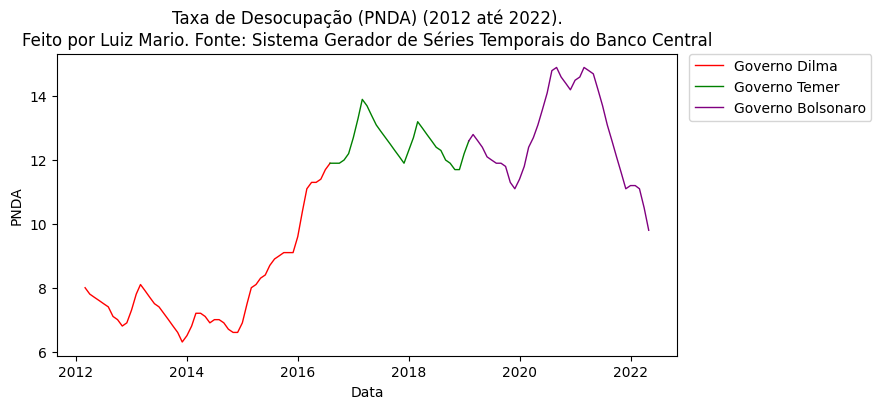

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(pnad["Date"].iloc[0:54],
        pnad['PNDA'].iloc[0:54],
        color = 'red',
        linewidth = 1)
ax.plot(pnad["Date"].iloc[53:84],
        pnad['PNDA'].iloc[53:84],
        color = 'green',
        linewidth = 1)
ax.plot(pnad["Date"].iloc[83:],
        pnad['PNDA'].iloc[83:],
        color = 'purple',
        linewidth = 1)
plt.title("Taxa de Desocupação (PNDA) (2012 até 2022).\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central", loc='center')
ax.set_ylabel("PNDA")
ax.set_xlabel("Data")
plt.legend(labels = ['Governo Dilma','Governo Temer','Governo Bolsonaro'], loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


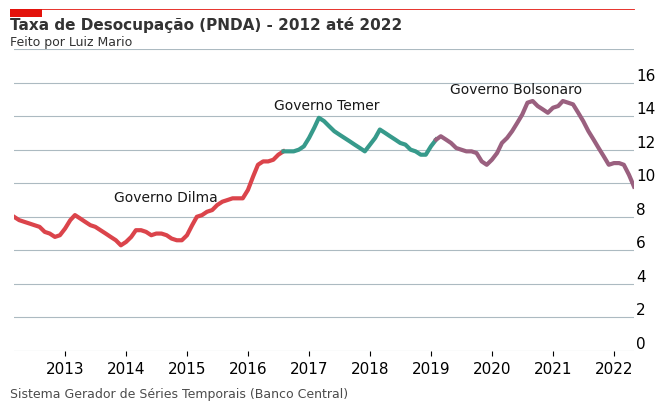

In [ ]:
# Layout The Economist 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
ax.plot(pnad["Date"].iloc[0:54],
        pnad['PNDA'].iloc[0:54],
        color = '#DB444B',
        linewidth = 3)
ax.plot(pnad["Date"].iloc[53:84],
        pnad['PNDA'].iloc[53:84],
        color = '#379A8B',
        linewidth = 3)
ax.plot(pnad["Date"].iloc[83:],
        pnad['PNDA'].iloc[83:],
        color = '#9A607F',
        linewidth = 3)
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(0,18)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(2012, 3, 1), pd.datetime(2022, 5, 1))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(0,18,2), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.25, y=.50, s='Governo Dilma', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.45, y=.73, s='Governo Temer', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.67, y=.77, s='Governo Bolsonaro', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.93, s="Taxa de Desocupação (PNDA) - 2012 até 2022", transform=fig.transFigure, ha='left', fontsize=11, weight='bold', alpha=.8)
ax.text(x=0.12, y=.89, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=9, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Sistema Gerador de Séries Temporais (Banco Central)""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',           # Configurando o caminho e o nome do arquivo
            dpi = 300,                     # Configurando os pontos por polegada
            bbox_inches="tight",           # Removendo espaço em branco extra
            facecolor='white')             # Configurando o fundo para branco

Text(0.5, 1.0, 'IPCA e IGP comparados em sua variação mensal - Janeiro de 2019 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central')

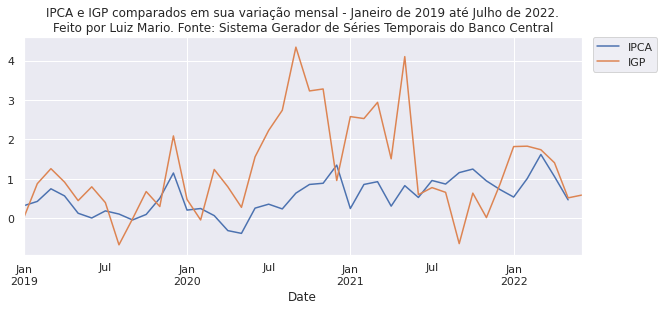

In [ ]:
# Gráfico conjunto IGP e IPCA
dados = sgs.get([433,189], start = '2019-01-01')
# Plotando o gráfico 
sns.set_theme()
sns.set(rc={"figure.figsize":(10, 4)})
dados.plot()
plt.legend(labels = ["IPCA","IGP"], loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.title('IPCA e IGP comparados em sua variação mensal - Janeiro de 2019 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central', loc='center')

Text(0.5, 1.0, 'Taxas de Câmbio Nominais - Janeiro de 2000 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central')

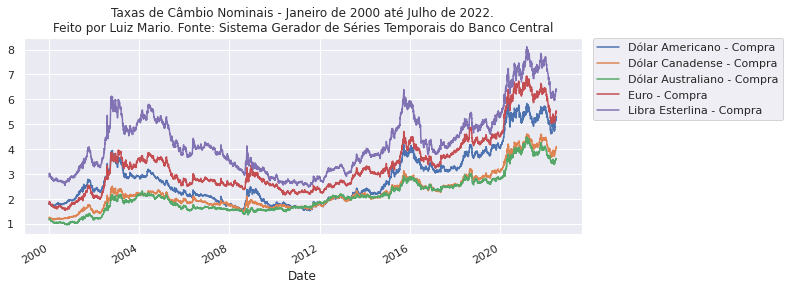

In [ ]:
# Taxas de Câmbio Nominais 
dados_cambio_nominal = sgs.get([10813,21636,21634,21620,21624], start = '2000-01-01')
# Plotando o gráfico 
sns.set_theme()
sns.set(rc={"figure.figsize":(10, 4)})
dados_cambio_nominal.plot()
plt.legend(labels = ["Dólar Americano - Compra","Dólar Canadense - Compra","Dólar Australiano - Compra","Euro - Compra","Libra Esterlina - Compra"], loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.title('Taxas de Câmbio Nominais - Janeiro de 2000 até Julho de 2022.\nFeito por Luiz Mario. Fonte: Sistema Gerador de Séries Temporais do Banco Central', loc='center')

## Layout Oficial dos Gráficos da Liga de Mercado Financeiro da UnB

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


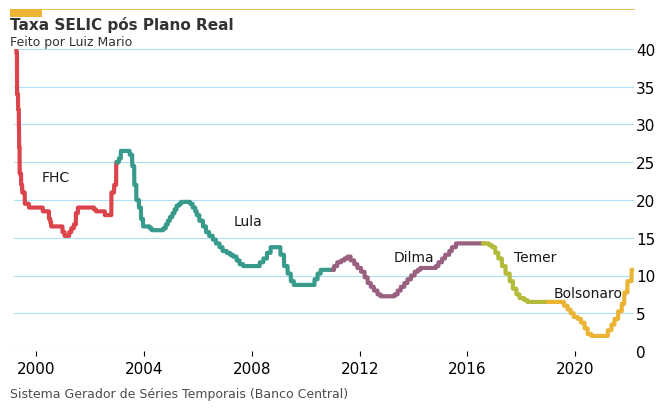

In [6]:
# Layout LMF
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#7BC8F6', alpha=0.6, zorder=1)
# Plotando os dados 
ax.plot(tx_selic["Date"].iloc[0:1399],
        tx_selic['Taxa SELIC'].iloc[0:1399],
        color = '#DB444B',
        linewidth = 3)
ax.plot(tx_selic["Date"].iloc[1398:4323],
        tx_selic['Taxa SELIC'].iloc[1398:4323],
        color = '#379A8B',
        linewidth = 3)
ax.plot(tx_selic["Date"].iloc[4322:6360],
        tx_selic['Taxa SELIC'].iloc[4322:6360],
        color = '#9A607F',
        linewidth = 3)
ax.plot(tx_selic["Date"].iloc[6359:7243],
        tx_selic['Taxa SELIC'].iloc[6359:7243],
        color = '#B4BA39',
        linewidth = 3)
ax.plot(tx_selic["Date"].iloc[7242:],
        tx_selic['Taxa SELIC'].iloc[7242:],
        color = '#EBB434',
        linewidth = 3)
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(0,40)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(1999, 3, 5), pd.datetime(2022, 3, 8))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.16, y=.55, s='FHC', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.40, y=.44, s='Lula', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.60, y=.35, s='Dilma', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.75, y=.35, s='Temer', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.80, y=.26, s='Bolsonaro', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#EBB434', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#EBB434', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.93, s="Taxa SELIC pós Plano Real", transform=fig.transFigure, ha='left', fontsize=11, weight='bold', alpha=.8)
ax.text(x=0.12, y=.89, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=9, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Sistema Gerador de Séries Temporais (Banco Central)""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',           # Configurando o caminho e o nome do arquivo
            dpi = 300,                     # Configurando os pontos por polegada
            bbox_inches="tight",           # Removendo espaço em branco extra
            facecolor='lightblue')             # Configurando o fundo para branco